# Welcome to the Tutorial of python plot

In lesson two, we would like to plot some UV-vis spectra data.

From absorption vs wavelength tranfer to Tauc plot.

After normal plot, we will define a linaer fit function for Band gap estimation.



In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fn = ['../demo_data/UV_demo-1.txt',
      '../demo_data/UV_demo-2.txt',
      '../demo_data/UV_demo-3.txt',
      '../demo_data/UV_demo-4.txt',]


uv = [(np.loadtxt(n, skiprows=1)[::-1].T)
      for n in fn]

uv

[array([[2.00000e+02, 2.01000e+02, 2.02000e+02, ..., 7.97000e+02,
         7.98000e+02, 7.99000e+02],
        [4.56152e+00, 4.57503e+00, 4.64298e+00, ..., 4.09381e-01,
         4.07033e-01, 4.04647e-01]], shape=(2, 600)),
 array([[2.00000e+02, 2.01000e+02, 2.02000e+02, ..., 7.97000e+02,
         7.98000e+02, 7.99000e+02],
        [4.47253e+00, 4.53609e+00, 4.66656e+00, ..., 1.74115e-01,
         1.72819e-01, 1.71505e-01]], shape=(2, 600)),
 array([[2.00000e+02, 2.01000e+02, 2.02000e+02, ..., 7.97000e+02,
         7.98000e+02, 7.99000e+02],
        [4.25557e+00, 4.27891e+00, 4.31356e+00, ..., 1.51416e-01,
         1.50570e-01, 1.49540e-01]], shape=(2, 600)),
 array([[2.00000e+02, 2.01000e+02, 2.02000e+02, ..., 7.97000e+02,
         7.98000e+02, 7.99000e+02],
        [4.04062e+00, 4.03239e+00, 4.02689e+00, ..., 1.45478e-01,
         1.44633e-01, 1.43786e-01]], shape=(2, 600))]

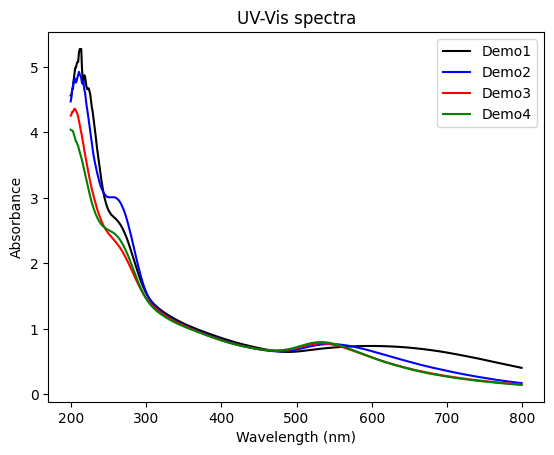

In [4]:
# use "for loop" do multiple plot.
x = [ar[0]
     for ar in uv]
y = [ar[1]
     for ar in uv]

colors = ['k', 'b', 'r', 'g']
lines  = ['-']*4
symbol = ['']*4
labels = ['Demo1', 'Demo2', 'Demo3', 'Demo4']

for i in range(4):
    plt.plot(x[i], y[i], color=colors[i], marker=symbol[i], linestyle=lines[i], label=labels[i])

plt.title("UV-Vis spectra")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.legend()
plt.show()

# From UV–Vis Absorbance to Tauc Plot

## Step 1 — Photon energy (eV)
Convert wavelength (nm) to photon energy:

`E = h * c / λ`

where  

- `E` = photon energy (J)  
- `h = 6.62607015 × 10⁻³⁴ J·s` (Planck constant)  
- `c = 2.99792458 × 10⁸ m/s` (speed of light in vacuum)  
- `λ` = wavelength (m)

### Convert to electronvolts (eV)

Since `1 eV = 1.602176634 × 10⁻¹⁹ J`:

`E (eV) = (h * c / λ) / e`

= `(6.62607015e-34 * 2.99792458e8) / (λ * 1.602176634e-19)`

Simplify constants:

`E (eV) ≈ 1239.841984 / λ (nm)`

Example: for `λ = 500 nm` → `hν = 1240 / 500 = 2.48 eV`

---

## Step 2 — Absorption coefficient (α)
From absorbance `A` (base-10) and path length `d` (cm):

`α = ln(10) * A / d ≈ 2.303 * A / d    [cm^-1]`

---

## Step 3 — Tauc quantity
Compute the Tauc y-value `y = (α * hν)^p` and plot `y` vs `hν`.

- **Direct allowed transition**
  - `p = 2`  →  `y = (α * hν)^2`

- **Indirect allowed transition**
  - `p = 1/2` → `y = (α * hν)^(1/2)`

---

## Step 4 — Estimating the bandgap (Eg)
1. Identify the (quasi-)linear portion of the Tauc plot.  
2. Fit a straight line `y = m * (hν) + b` to that region.  
3. Extrapolate to `y = 0`: the bandgap is

`Eg = -b / m`   (in eV)

---

## Quick checklist
- Ensure `λ` in nm and `d` in cm.  
- Use `α = 2.303*A/d`.  
- Try both exponents (`p = 2` and `p = 0.5`) if transition type is unknown.  
- Subtract baseline if absorbance has an offset (instrument background).



In [5]:
def absorbance_to_tauc(wavelength_nm, absorbance, path_length_cm=1.0, transition='direct'):
    """
    Convert UV–Vis absorbance data to Tauc plot quantities.

    Parameters
    ----------
    wavelength_nm : 1D array-like
        Wavelengths in nm.
    absorbance : 1D array-like
        Absorbance (log10 I0/I).
    path_length_cm : float, default 1.0
        Optical path length in cm.
    transition : str, 'direct' or 'indirect'
        Transition type for Tauc plot.
        'direct'   -> exponent = 2
        'indirect' -> exponent = 0.5

    Returns
    -------
    hv : ndarray
        Photon energy in eV.
    alpha : ndarray
        Absorption coefficient in cm^-1.
    y_tauc : ndarray
        Tauc quantity (alpha*hv)^p, where p=2 or 0.5.
    """
    wl = np.asarray(wavelength_nm).flatten()
    A = np.asarray(absorbance).flatten()
    if wl.size != A.size:
        raise ValueError("wavelength and absorbance arrays must have same length")

    # Photon energy (eV)
    
    hv = 1239.841984 / wl

    # Absorption coefficient (cm^-1)
    alpha = 2.303 * A / float(path_length_cm)

    # Exponent selection
    exponent = 2.0 if transition.lower().startswith('d') else 0.5

    # Tauc y quantity
    y_tauc = (alpha * hv) ** exponent

    return hv, alpha, y_tauc


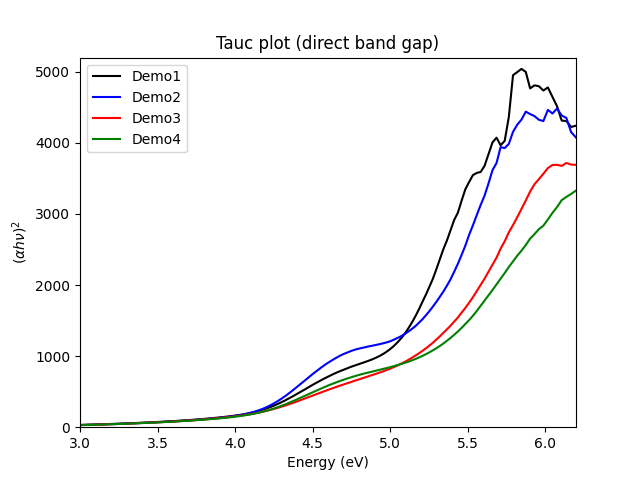

In [6]:
# convert Absorbence to Tauc first
# %matplotlib notebook
%matplotlib widget
tauc_x = [absorbance_to_tauc(ar[0], ar[1])[0]
          for ar in uv]

tauc_y = [absorbance_to_tauc(ar[0], ar[1])[2]
          for ar in uv]

colors = ['k', 'b', 'r', 'g']
lines  = ['-']*4
symbol = ['']*4
labels = ['Demo1', 'Demo2', 'Demo3', 'Demo4']

for i in range(4):
    plt.plot(tauc_x[i], tauc_y[i], color=colors[i], marker=symbol[i], linestyle=lines[i], label=labels[i])

plt.title("Tauc plot (direct band gap)")
plt.xlabel('Energy (eV)')
plt.ylabel(r"$(\alpha h\nu)^2$")
plt.xlim(3,6.2)
plt.ylim(-0.1, 5200)
plt.legend()
plt.show()